In [1]:
from PIL import Image
import numpy as np
from matplotlib.image import pil_to_array
import healpy as hp
import matplotlib.pyplot as plt
import time
import warnings
#from pixell import reproject
import ST

In [2]:
map_sz=hp.read_map("/Users/arefe/Projects/ScatteringTransform/maps/COM_CompMap_Compton-SZMap-milca-ymaps_2048_R2.00.fits")


In [3]:
nside_0256 = 512
lmax_0256 = 3*nside_0256-1
res_0256 = hp.nside2resol (nside_0256 , arcmin = False)
res_0256_arcmin = hp.nside2resol (nside_0256 , arcmin = True)
print ("Pixel area: %.2f square degrees" % hp.nside2pixarea(nside_0256, degrees=True))

Pixel area: 0.01 square degrees


In [4]:
map_sz_0256 = hp.ud_grade(map_sz , nside_out=nside_0256)
map_sz_0256 += np.abs(np.min(map_sz_0256))

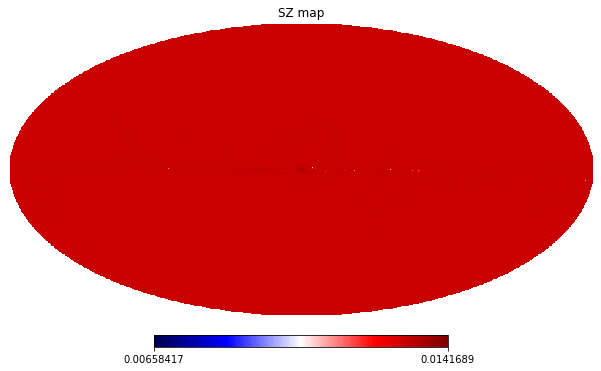

In [5]:
hp.mollview(map_sz_0256, cmap = 'seismic', title="SZ map" )

In [6]:
resol_0256 = hp.nside2resol(nside_0256 , arcmin = False )
resol_0256_arcmin = hp.nside2resol(nside_0256 , arcmin=True)
theta_bin = 10000
jmax = int(np.floor(np.log(2*np.pi *0.75 /resol_0256 / 2)/np.log(2)))
print(jmax)
Jf=np.arange(jmax)
scale_0256 = 2**Jf*((2*resol_0256_arcmin)/0.75)

10


In [7]:
morlet_l_arr = ST.morlet_arr(res_0256 , jmax , lmax_0256 , theta_bin)

/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:1242: ComplexWarning: Casting complex values to real discards the imaginary part
  window[0] = trapz(beam * p0 * st, theta)
/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:1243: ComplexWarning: Casting complex values to real discards the imaginary part
  window[1] = trapz(beam * p1 * st, theta)
/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:1247: ComplexWarning: Casting complex values to real discards the imaginary part
  window[l] = trapz(beam * p2 * st, theta)


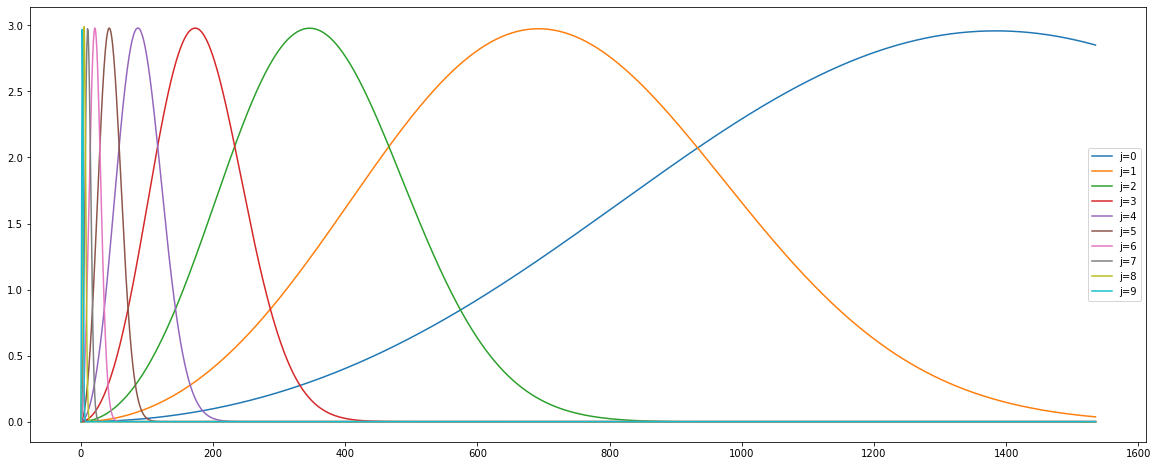

In [8]:
ell = np.arange (lmax_0256+1)
fig=plt.figure(figsize=[20,8])
for j in range(jmax):
    plt.plot(ell,morlet_l_arr[j],label='j='+str(j))
    plt.legend()
    

#plt.xlim (0,10000)

In [9]:
alm_sz = hp.map2alm (map_sz_0256)
almsize_0256 = alm_sz.shape[0]
mapsize_0256 = map_sz_0256.shape[0]

In [10]:
cl_sz = hp.anafast(map_sz_0256)

In [11]:
ell_0256=np.arange(0,lmax_0256+1)
norm_0256 = ell_0256 * (ell_0256+1) / (2*np.pi)
dl_sz_0256 = cl_sz*norm_0256
ellsc_0256 = 360*60/ell_0256

<ipython-input-11-185632eedb4f>:4: RuntimeWarning: divide by zero encountered in true_divide
  ellsc_0256 = 360*60/ell_0256


In [48]:
alm_delta_0256 = np.zeros(almsize_0256,dtype=np.complex_)
alm_delta_0256[:lmax_0256+1] = 1+0j
map_delta_0256 = hp.alm2map (alm_delta_0256, nside_0256)

In [17]:
S1_delta , i1_delta = ST.compS1 (map_delta_0256 , morlet_l_arr , jmax, nside_0256)
S2_delta , i2_delta = ST.compS2 (i1_delta, morlet_l_arr, jmax, nside_0256)

0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8


In [12]:
S1 , i1 = ST.compS1 (map_sz_0256 , morlet_l_arr , jmax, nside_0256)
#S2 , i2 = ST.compS2 (i1, morlet_l_arr, jmax, nside_0256)

0
1
2
3
4
5
6
7
8
9


<ipython-input-16-8b87a9c039e2>:7: RuntimeWarning: divide by zero encountered in true_divide
  ax[0].loglog(1/ell, dl_sz_0256)


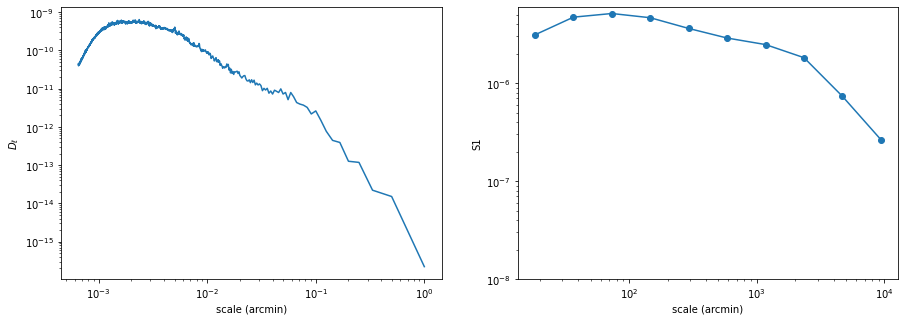

In [16]:
fig, ax = plt.subplots(1, 2,sharey=False,squeeze=True,figsize=(15,5))
#plt.figure(figsize=(15,7))
#plt.plot (scale,s1_sz,'o-')
#plt.plot (scale,s1_sz_out,'o-')
ax[1].plot(scale_0256, S1,'o-', lw=1.5)
#plt.loglog(ellsc_0256, dl_sz_0256)
ax[0].loglog(1/ell, dl_sz_0256)
#plt.loglog(scale_0256,s1_sz_0256_out/s0_sz_0256_out,'o-')
#plt.legend(["SZ map", "Regenerated SZ map"])
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_yticks([10**-6,10**-7,10**-8])
ax[1].set_xlabel("scale (arcmin)")
ax[1].set_ylabel("S1")
ax[0].set_xlabel("scale (arcmin)")
ax[0].set_ylabel("$D_\ell$")
plt.savefig("SZ_S1PS_2048.pdf")


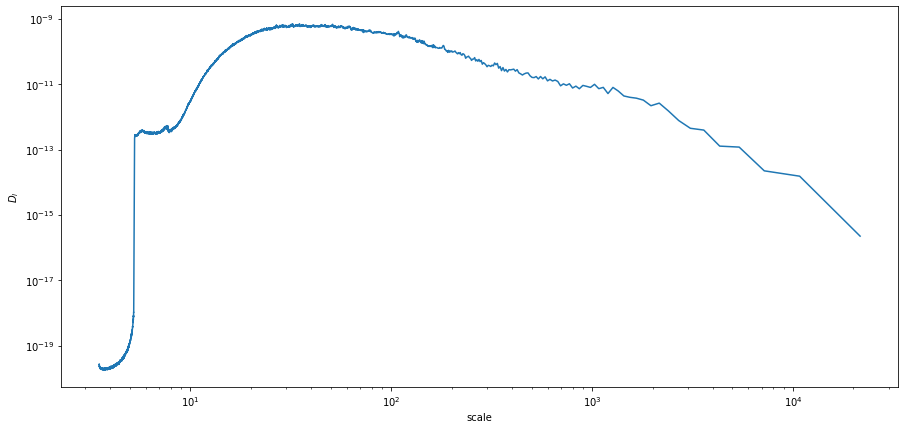

In [133]:
fig = plt.figure (figsize = (15,7))
plt.loglog(ellsc_0256, dl_sz_0256)
#plt.loglog(ellsc_0256, dl_sz_0256_out)
plt.xlabel("scale")
plt.ylabel("$D_l$")
#plt.legend (["SZ map" , "Regenerated SZ map"])
plt.savefig("SZ_PS_2048.pdf")

In [25]:
S0 =  np.mean (np.abs(map_sz_0256))
print(S0**2)



6.135935117158962e-05


In [20]:
S2_normalized = S2/S2_delta
S1_normalized = S1/S1_delta
S1_normalized

array([1.08115881e-05, 7.53209902e-05, 4.98410256e-05, 2.69608539e-05,
       1.51720485e-05, 9.19322701e-06, 4.80065174e-06, 1.39635890e-06,
       3.71866778e-07])

In [21]:
I0sqrt =  np.mean (map_sz_0256**2)
print (I0sqrt)

6.136014e-05


In [22]:
S2_sum = 0
for i in range (jmax):
    for j in range (i+1 , jmax):
        S2_sum+=S2_normalized[i,j]**2

In [23]:
RHS = S0**2 + np.sum (S1_normalized**2) + S2_sum
RHS

6.13794735498725e-05

In [24]:
(I0sqrt - RHS)/I0sqrt

-0.0003151337987969164

In [84]:
S3 = ST.compS3(i2, morlet_l_arr, jmax, nside_0256)

0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
1 2
1 3
1 4
1 5
1 6
1 7
1 8
2 3
2 4
2 5
2 6
2 7
2 8
3 4
3 5
3 6
3 7
3 8
4 5
4 6
4 7
4 8
5 6
5 7
5 8
6 7
6 8
7 8


In [87]:
S3_delta = ST.compS3(i2_delta, morlet_l_arr, jmax, nside_0256)

0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
1 2
1 3
1 4
1 5
1 6
1 7
1 8
2 3
2 4
2 5
2 6
2 7
2 8
3 4
3 5
3 6
3 7
3 8
4 5
4 6
4 7
4 8
5 6
5 7
5 8
6 7
6 8
7 8


In [88]:
S3_added = ST.compS3(i2_added, morlet_l_arr, jmax, nside_0256)

0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
1 2
1 3
1 4
1 5
1 6
1 7
1 8
2 3
2 4
2 5
2 6
2 7
2 8
3 4
3 5
3 6
3 7
3 8
4 5
4 6
4 7
4 8
5 6
5 7
5 8
6 7
6 8
7 8


In [94]:
S3_sum_added = 0
i = 2
for j in range (i+1 , jmax):
    for k in range (j+1 , jmax):
        S3_sum_added+=(S3_added[i,j,k]/S3_delta[i,j,k])**2

In [77]:
RHS = S0**2 + np.sum (S1_normalized**2) + S2_sum +  S3_sum

In [96]:
I1sqrt_added = np.mean(np.abs(i1_added)**2)
I1sqrt_normalized_added  = I1sqrt_added/S1_delta**2

i = 2
(I1sqrt_normalized_added[i] - S1_normalized_added[i]**2 - np.sum(S2_normalized_added[i,i+1:]**2)-S3_sum_added)/I1sqrt_normalized_added[i]

0.7495273523828387

In [100]:
np.mean(np.abs(map_delta_0256))

21.380618403406615

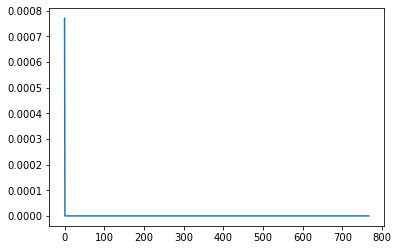

In [26]:
cl_sz_0256 = hp.anafast(map_sz_0256)
plt.plot (ell_0256, cl_sz_0256)

0.0040481313428191775
0.008096262685638355


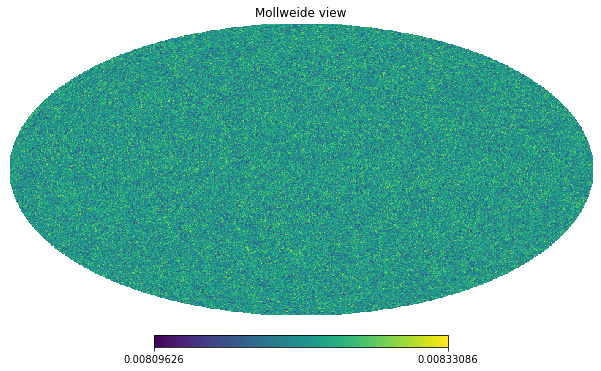

In [27]:
map_reg_0256 = hp.synfast(cl_sz_0256, nside_0256)
print(min(map_reg_0256))
map_reg_0256 = map_reg_0256 + np.abs(min(map_reg_0256))
print (min(map_reg_0256))
hp.mollview(map_reg_0256)

In [28]:
S1_reg , i1_reg = ST.compS1 (map_reg_0256 , morlet_l_arr , jmax, nside_0256)
S2_reg , i2_reg = ST.compS2 (i1_reg, morlet_l_arr, jmax, nside_0256)

0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8


In [32]:
S0_reg =  np.mean (np.abs(map_reg_0256))
print(S0_reg**2)


6.759295176996335e-05


In [33]:
S2_reg_normalized = S2_reg/S2_delta
S1_reg_normalized = S1_reg/S1_delta
S1_reg_normalized

array([7.25386319e-05, 6.32583734e-04, 3.26947800e-04, 1.20096488e-04,
       4.56492959e-05, 1.99754290e-05, 7.48386092e-06, 1.54824288e-06,
       4.43701821e-07])

In [34]:
I0sqrt_reg =  np.mean (map_reg_0256**2)
print (I0sqrt_reg)

6.759365518678014e-05


In [35]:
S2_reg_sum = 0
for i in range (jmax):
    for j in range (i+1 , jmax):
        S2_reg_sum+=S2_reg_normalized[i,j]**2

In [36]:
RHS_reg = S0_reg**2 + np.sum (S1_reg_normalized**2) + S2_reg_sum

In [37]:
(I0sqrt_reg - RHS_reg)/I0sqrt_reg

-0.008297194170144495

In [84]:
lmax_0256 = 3*nside_0256 -1 

In [85]:
ell_0256 = np.arange(0,lmax_0256+1)
ellsc_0256 = 21600/ell_0256
norm_0256 = ell_0256 * (ell_0256+1) / (2*np.pi)

<ipython-input-85-021124972f74>:2: RuntimeWarning: divide by zero encountered in true_divide
  ellsc_0256 = 21600/ell_0256


In [86]:
dl_test_0256 = ell_0256**2 / (1e8 + ell_0256**4) * 2e10

cl_test_0256 = dl_test_0256/ norm_0256
cl_test_0256[0] = 0

<ipython-input-86-cc01de8197f3>:3: RuntimeWarning: invalid value encountered in true_divide
  cl_test_0256 = dl_test_0256/ norm_0256


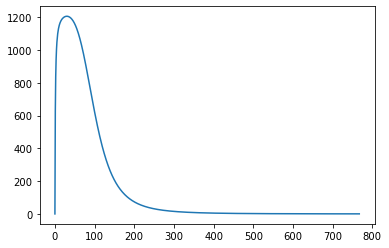

In [88]:
plt.plot (ell_0256 , cl_test_0256)

Text(0, 0.5, 'Dl')

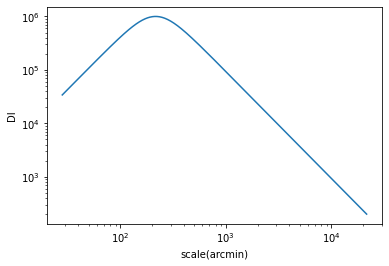

In [89]:
plt.loglog (ellsc_0256 , dl_test_0256)
plt.xlabel("scale(arcmin)")
plt.ylabel("Dl")

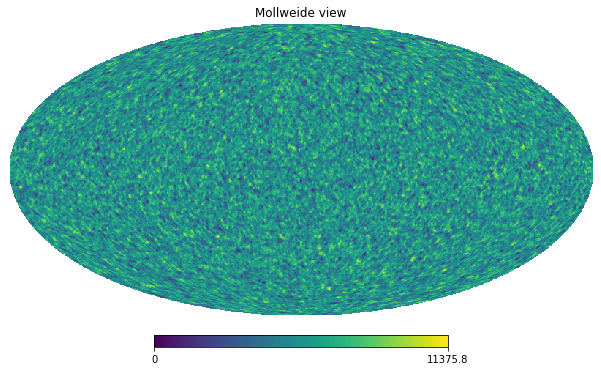

In [132]:
map_test_0256 = hp.synfast (cl_test_0256 , nside_0256)
map_test_0256 += np.abs (min(map_test_0256))
alm_test_0256 = hp.map2alm (map_test_0256)
almsize_0256 = alm_test_0256.shape[0]
mapsize_0256 = map_test_0256.shape[0]
hp.mollview(map_test_0256)

In [131]:
S1_test , i1_test = ST.compS1 (map_test_0256 , morlet_l_arr , jmax, nside_0256)
S2_test , i2_test = ST.compS2 (i1_test, morlet_l_arr, jmax, nside_0256)

0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8


In [134]:
S0_test =  np.mean (np.abs(map_test_0256))
print(S0_test)


5809.070567806354


In [133]:
S2_test_normalized = S2_test/S2_delta
S1_test_normalized = S1_test/S1_delta
S1_test_normalized

array([ 11.28230368,  44.8525459 , 137.53265038, 209.14669124,
       188.13001236, 136.46605999,  95.96295172,  56.94156624,
        26.61391565])

In [135]:
I0sqrt_test =  np.mean (map_test_0256**2)
print (I0sqrt_test)

35269965.24800947


In [136]:
S2_test_sum = 0
for i in range (jmax):
    for j in range (i+1 , jmax):
        S2_test_sum+=S2_test_normalized[i,j]**2

In [137]:
RHS_test = S0_test**2 + np.sum (S1_test_normalized**2) + S2_test_sum

In [138]:
(I0sqrt_test - RHS_test)/I0sqrt_test

0.039044899051446424